# SARIMA

https://www.mhlw.go.jp/stf/covid-19/open-data.html

## Omajinai

In [7]:
import pandas as pd

import plotly.express as px

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [26]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2021-12-21 23:46:49--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 99.84.59.124, 99.84.59.6, 99.84.59.101, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|99.84.59.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93692 (91K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>]  91.50K  --.-KB/s    in 0.02s   

2021-12-21 23:46:49 (4.34 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [93692/93692]



In [27]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
df

(705, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-16,164,12,1,0,0,0,0,0,2,3,15,8,3,30,36,10,0,0,0,0,1,1,5,3,0,1,1,14,4,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,2,6
2021-12-17,162,3,0,0,0,0,1,0,0,2,52,6,8,20,23,12,0,0,0,1,1,0,0,5,0,4,4,15,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2021-12-18,179,14,0,0,0,0,0,0,1,1,19,11,14,28,29,10,0,0,0,0,2,3,3,7,0,1,6,14,7,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,6


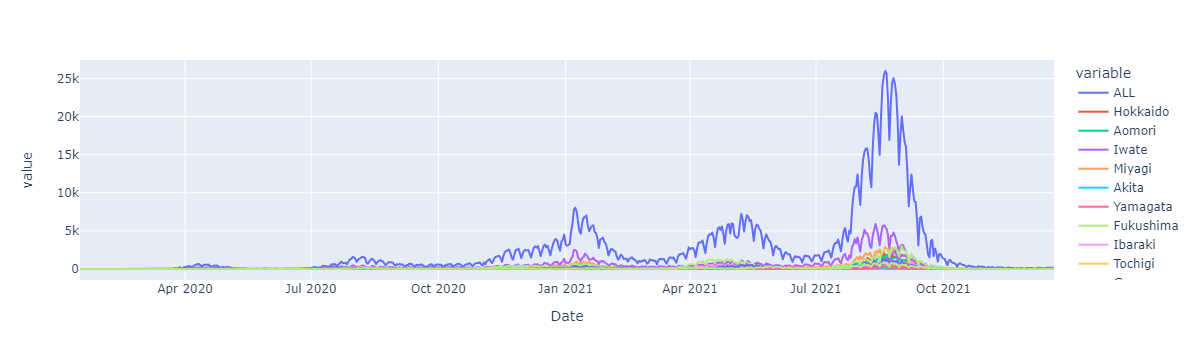

In [28]:
px.line(df, )

In [29]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).sum()
print(df_gr.shape)
df_gr.head()

(102, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-02,8,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-09,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-16,15,1,0,0,0,0,0,0,0,0,0,0,2,0,3,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


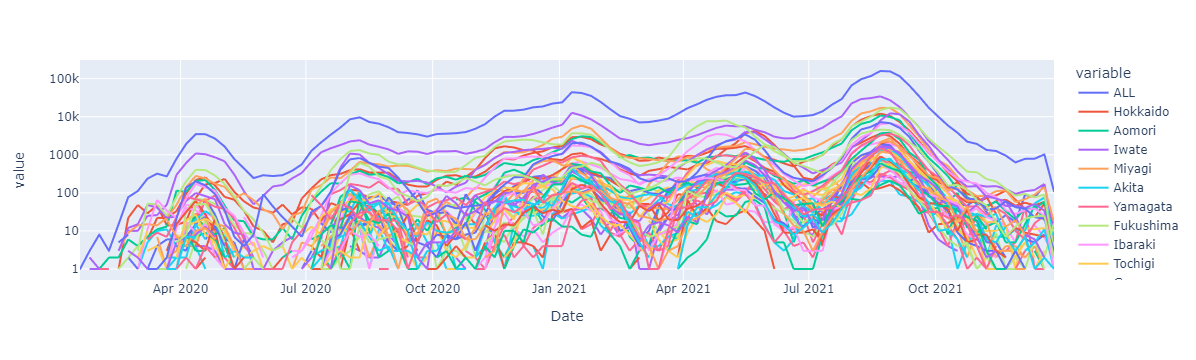

In [39]:
px.line(df_gr, log_y=True)

## SARIMA

In [42]:
model = SARIMAX(df_gr.ALL, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.23207D+00    |proj g|=  1.34893D-01

At iterate    5    f=  9.19481D+00    |proj g|=  4.45619D-03

At iterate   10    f=  9.18931D+00    |proj g|=  3.73456D-02


 This problem is unconstrained.



At iterate   15    f=  9.17812D+00    |proj g|=  3.01856D-03

At iterate   20    f=  9.17803D+00    |proj g|=  3.80449D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     28      1     0     0   3.804D-05   9.178D+00
  F =   9.1780314249674291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [43]:
result.forecast(10)

2022-01-02      668.199132
2022-01-09     2924.910105
2022-01-16    18682.113483
2022-01-23    33305.644675
2022-01-30    40243.033200
2022-02-06    57401.010382
2022-02-13    53826.822855
2022-02-20    34883.157149
2022-02-27    11923.605176
2022-03-06     -668.085016
Freq: W-SUN, Name: predicted_mean, dtype: float64